### Question 2: Player Ranking in Sports

In [1]:
%%capture
# install libraries
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn

In [2]:
## Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('icefire')

import warnings
warnings.filterwarnings('ignore')

### Objective: Devise a ranking system to determine the best players in a chosen sport based on historical statistical records.

#### Task 1: Data collection
- Choose a sport: baseball, football, basketball, cricket, or soccer.
- Identify a reliable data set or source with historical statistical records for all major participants in your chosen sport.
- Tools recommended: Python, pandas, web scraping libraries if necessary.

For the assignment, we selected players batting records from the game of Cricket in the T20 International format. The data is acquired from Cricinfo.com (https://www.espncricinfo.com/records/most-runs-in-career-282827)

In [3]:
### Load data
df = pd.read_csv('t20I.csv')
print(df.shape)
df.head()

(150, 15)


,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,V Kohli (IND),2010-2022,115,107,31,4008,122*,52.73,2905,137.96,1,37,4,356,117
1,RG Sharma (IND),2007-2022,148,140,17,3853,118,31.32,2767,139.24,4,29,10,348,182
2,MJ Guptill (NZ),2009-2022,122,118,7,3531,105,31.81,2602,135.70,2,20,3,309,173
3,Babar Azam (PAK),2016-2023,104,98,14,3485,122,41.48,2714,128.40,3,30,5,371,53
4,PR Stirling (IRE),2009-2023,131,130,11,3408,115*,28.63,2509,135.83,1,23,13,394,123


**Data description**
The dataset contains batting performance of 150 players, who are formally recognized as batsmen, depending on position they play for their respective countries. The list of attributes present in the dataset are as follows:
- Player: Name of the player along with the country code (in brackets)
- Span: The years the player represents in the international cricket
- Mat: Total international matches played
- Inns: Total innings the player batted
- NO: Number of innings the player batted and remain not-out
- Runs: Total runs the player scored in his career
- Ave: Average number of runs the player scored in the innings he batted
- BF: Total nmber of balls the player faced in his career
- SR: Runs / ball faced. This metric the rate at which the player scored the runs.
- 100: Number of innings the player scored 100 or more runs
- 50: Number of innings the player scored 50 or more runs, but less than 100
- 0: Number of innings the player dismissed without scoring runs
- 4s: Number of boundaries, Fours, the player scored in his career
0 6s: Number of boundaries, Sixes, the player scored in his career

In [4]:
## Data preparation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  150 non-null    object 
 1   Span    150 non-null    object 
 2   Mat     150 non-null    int64  
 3   Inns    150 non-null    int64  
 4   NO      150 non-null    int64  
 5   Runs    150 non-null    int64  
 6   HS      150 non-null    object 
 7   Ave     150 non-null    float64
 8   BF      150 non-null    int64  
 9   SR      150 non-null    float64
 10  100     150 non-null    object 
 11  50      150 non-null    int64  
 12  0       150 non-null    object 
 13  4s      150 non-null    int64  
 14  6s      150 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 17.7+ KB


In [5]:
# clean HS, 100, and 0 columns
df['HS'] = df['HS'].apply(lambda x: int(x.replace('*', '')))
df['100'] = df['100'].replace('-', 0).apply(int)
df['0'] = df['0'].replace('-', 0).apply(int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  150 non-null    object 
 1   Span    150 non-null    object 
 2   Mat     150 non-null    int64  
 3   Inns    150 non-null    int64  
 4   NO      150 non-null    int64  
 5   Runs    150 non-null    int64  
 6   HS      150 non-null    int64  
 7   Ave     150 non-null    float64
 8   BF      150 non-null    int64  
 9   SR      150 non-null    float64
 10  100     150 non-null    int64  
 11  50      150 non-null    int64  
 12  0       150 non-null    int64  
 13  4s      150 non-null    int64  
 14  6s      150 non-null    int64  
dtypes: float64(2), int64(11), object(2)
memory usage: 17.7+ KB


The dataset is clean and we can prceed with analysis.

#### Ranking System Development:
- Develop a system or algorithm to rank players at each position.
    - Define the criteria or metrics you'll use to rank the players (e.g., batting average for baseball, goals scored for soccer).
    - Discuss any weighting factors you'll apply to different metrics.

In the t20-international the rank of the player depends on the many factors including the runs he score along with the match situation, opponent team (and players), pitch and weather conditions.

To simplify the ranking, we will use three metrics:
1. Average number of runs the player scored per innings
2. Strike rate of the player. Player who scored the runs with mininum of balls faced is ranked higher, provided he scored more than 1500 runs.
3. Proportion of runs the player scored in boundaries.

The weights we applied for the three metrics are 0.5, 0.4, and 0.1 for the three criterias respectively. The retionalie is that player impact on match results is depenedent on the runs he scores, and the rate at which they are scored follows next, and in the end, the player scoring boundaries have psychological impact on the opponent team (and players) forcing them to make mistakes - and take advantage of the match situation.

### Data Analysis and Visualization:
- Apply your ranking system to the data set.
- Visualize the top players at each position using appropriate charts or graphs.
- Discuss any interesting patterns or anomalies you observe in the rankings.

In [7]:
# filter players who scored more than 1000 runs in their career
df = df[df['Runs'] > 1000]
df.shape

(130, 15)

Filter by total runs scored removes 21 playes from the dataset.

Ranks players by contribution using the above criteria

In [8]:
# Rank player by average score in the ascending order (top rank - highest average)
df['ave_rank'] = df['Ave'].rank(ascending = True)

# Rank player by strike rate in the descending order (top rank - highest strike rate)
df['sr_rank'] = df['SR'].rank(ascending = True)

# Rank player by total runs scored in boundaries (top rank - highest % runs in boundaries)
df['runs_boundaries'] = df['4s'] * 4 + df['6s'] * 6
df['pct_runs_in_boundaries'] = df['runs_boundaries'] / df['Runs']
df['pct_boundaries_rank'] = df['pct_runs_in_boundaries'].rank(ascending = True)

# Weighted rank
df['weighted_rank'] = (df['ave_rank'] * 0.5) + (df['sr_rank'] * 0.4) + (df['pct_boundaries_rank'] * 0.1)

<Figure size 400x400 with 0 Axes>

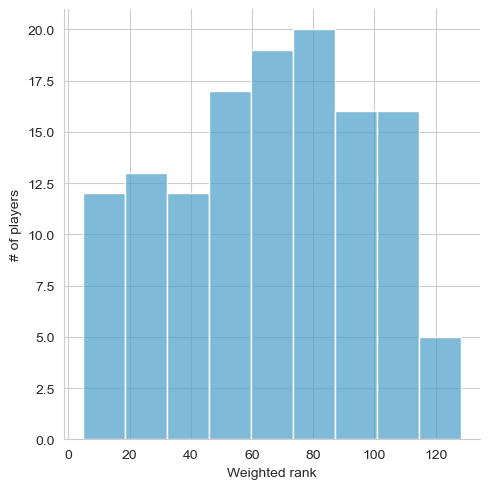

In [13]:
plt.figure(figsize = (4,4))
sns.displot(data = df, x = 'weighted_rank')
plt.xlabel('Weighted rank')
plt.ylabel('# of players')
plt.show()

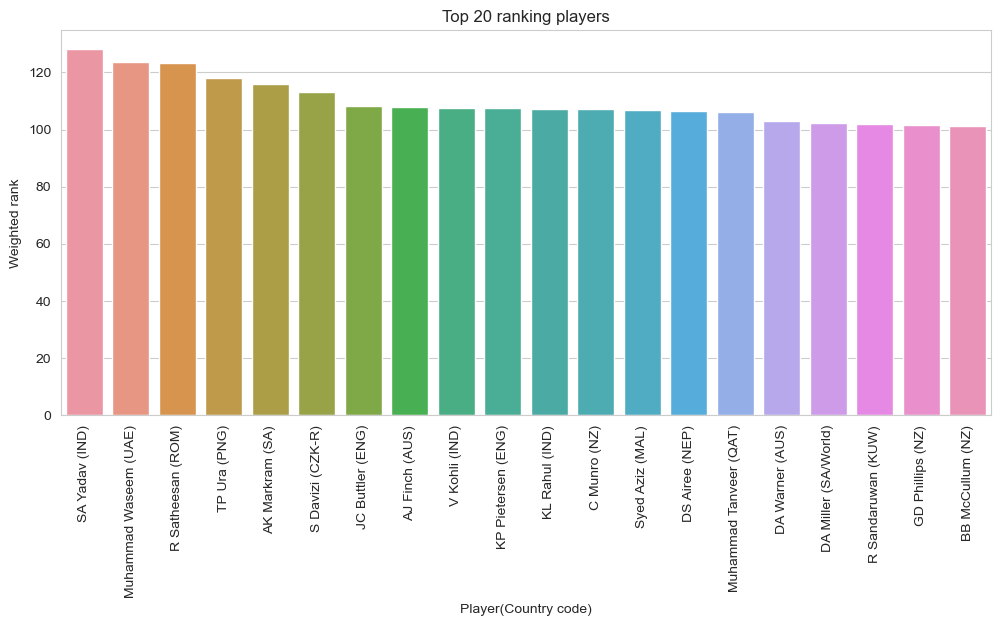

In [9]:
# inspect 20-top ranking players. Note that the top ranking players are with high weighted rank values.
df = df.sort_values(by = 'weighted_rank', ascending = False)

plt.figure(figsize=(12, 5))
sns.barplot(x = 'Player', y = 'weighted_rank', data = df.head(20))
plt.xlabel('Player(Country code)')
plt.ylabel('Weighted rank')
plt.title('Top 20 ranking players')
plt.xticks(rotation = 90)
plt.show()

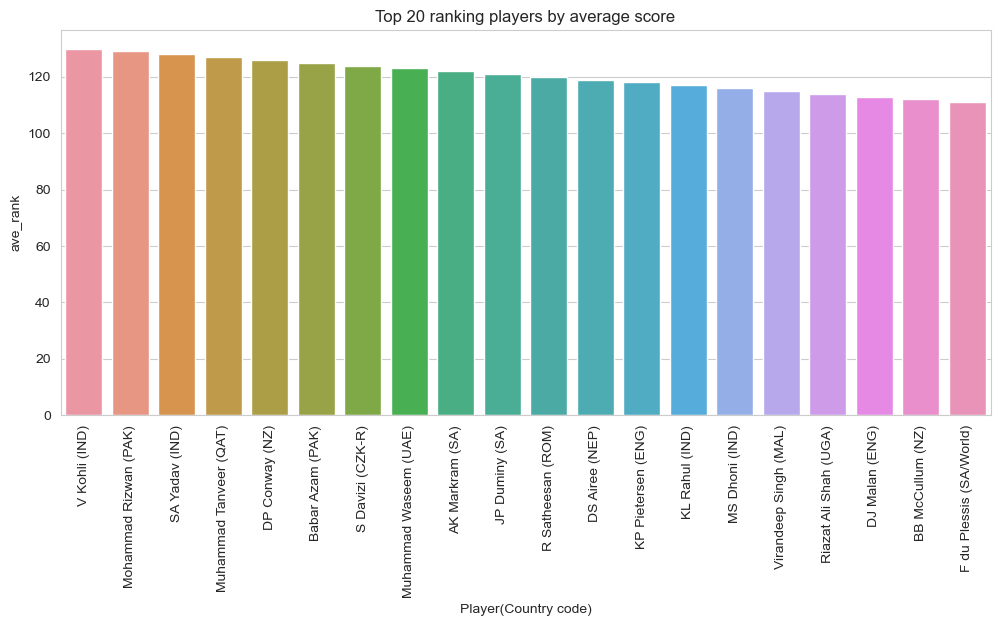

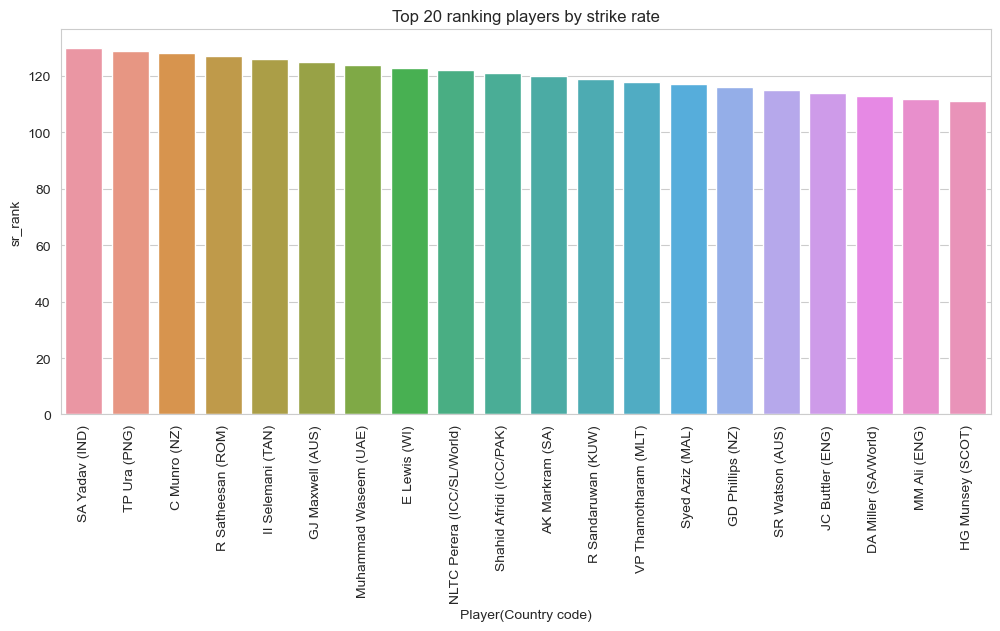

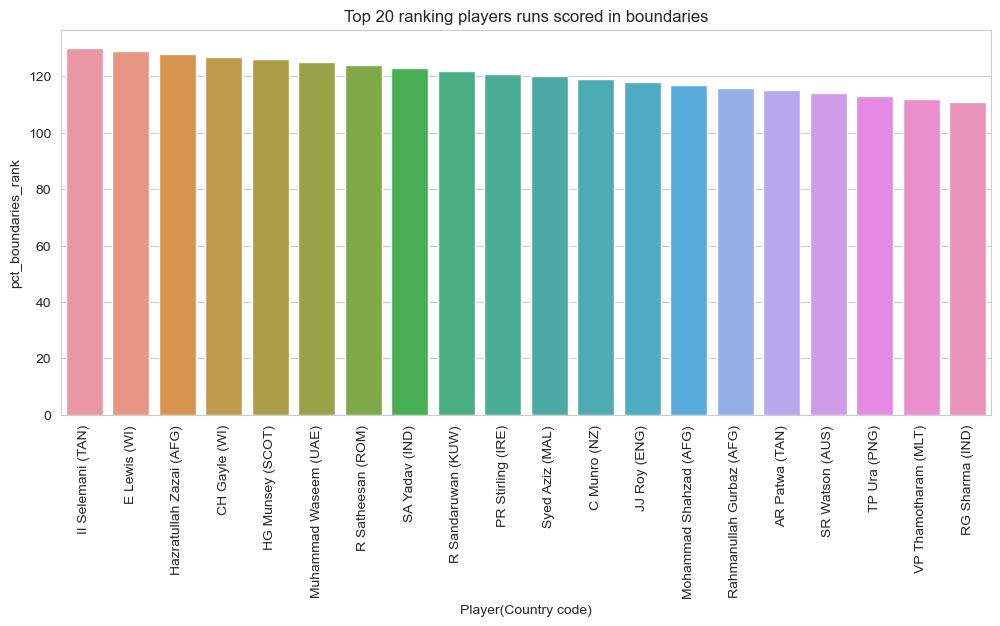

In [10]:
### Top 20-players by individual rankings

for y, title in [('ave_rank', 'Top 20 ranking players by average score'),
                 ('sr_rank', 'Top 20 ranking players by strike rate'),
                 ('pct_boundaries_rank', 'Top 20 ranking players runs scored in boundaries')]:
    df = df.sort_values(by = [y], ascending = False)

    plt.figure(figsize=(12, 5))
    sns.barplot(x = 'Player', y = y, data = df.head(20))
    plt.xlabel('Player(Country code)')
    plt.ylabel(y)
    plt.title(title)
    plt.xticks(rotation = 90)
    plt.show()

#### Discuss the limitations of your ranking system and potential improvements.

The primary limitation of the weighted ranking system is its implicity. The system do not take into consideration of the player performance against the quality of the opponent team, pitch conditions, and state of the match. For example, a low score a major contribution if it helped the team to win the match given the match conditions.

### END